### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_train = pd.read_csv("./Dataset/train.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### SPLIT NUM AND CATEGORICAL VARIABEL

In [35]:
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

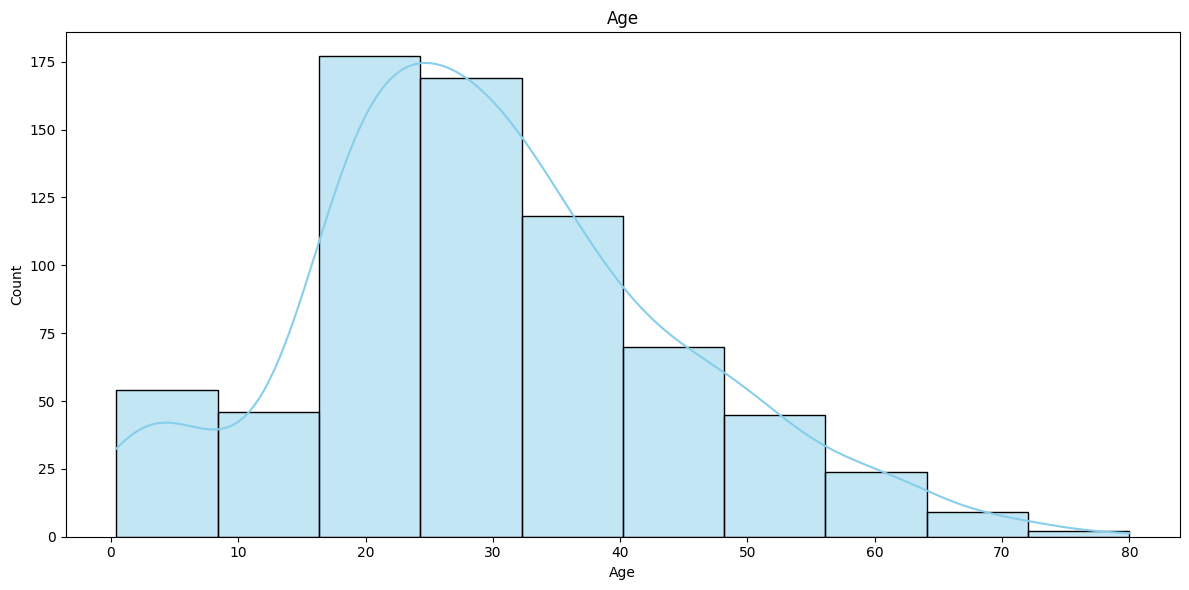

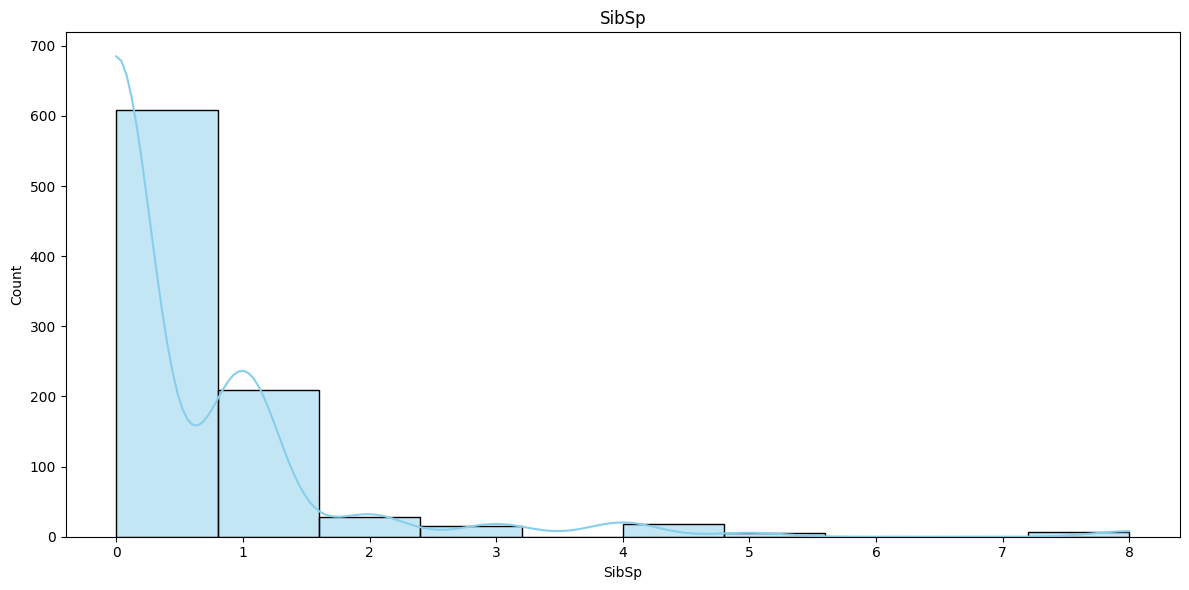

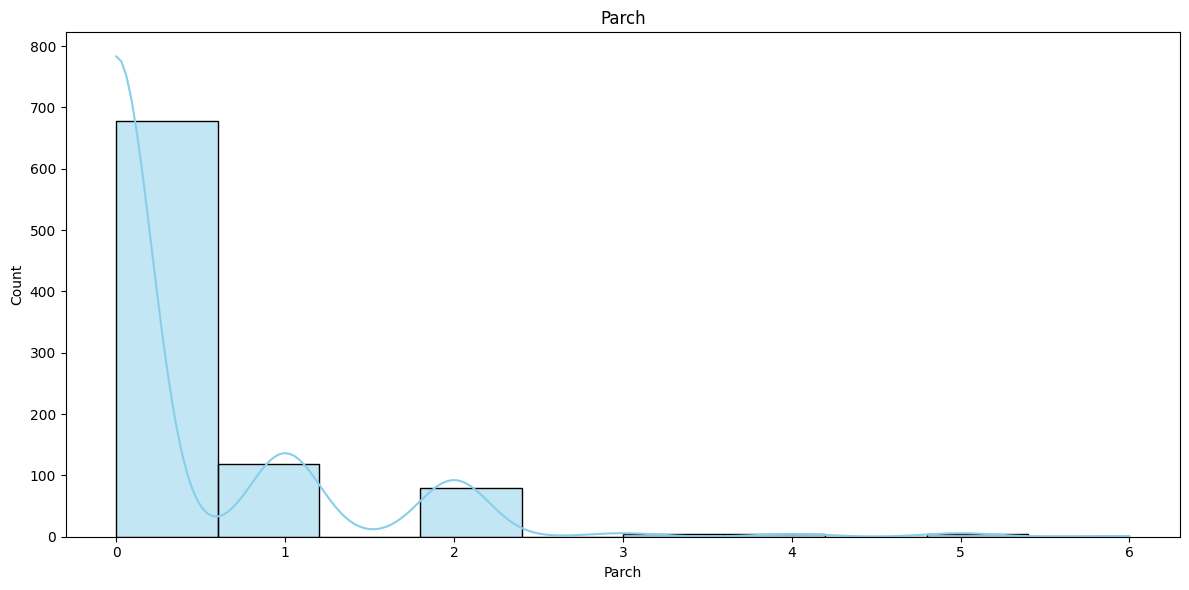

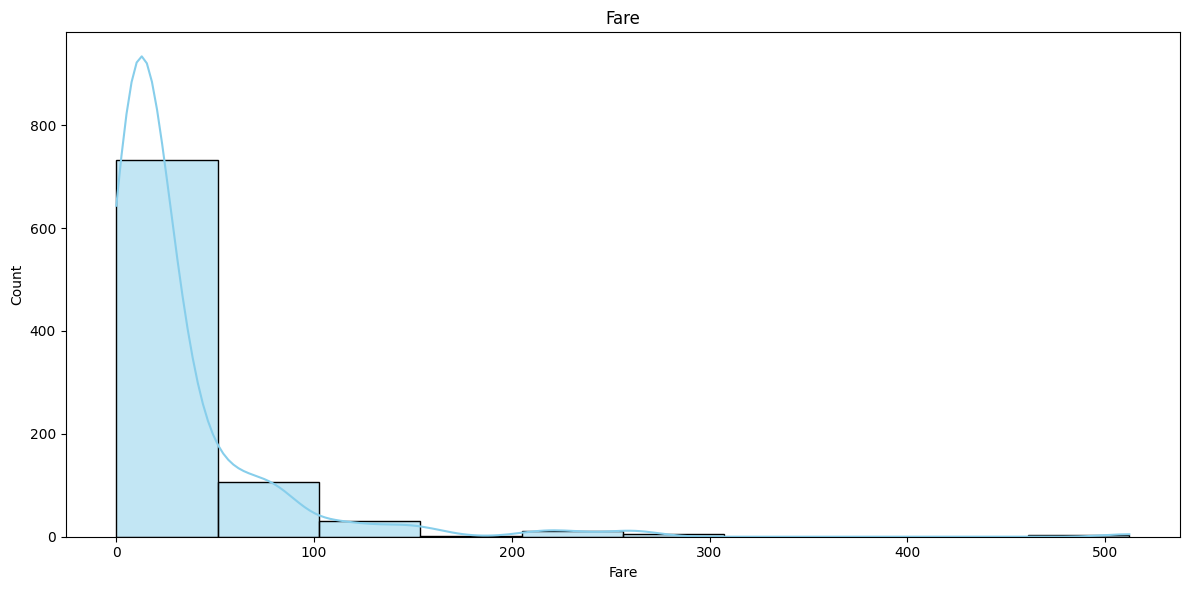

In [45]:
for i in df_num.columns:
    fig = plt.subplots( figsize=(12, 6))
    sns.histplot(df_num[i], bins=10, kde=True, color='skyblue')
    plt.title(i)
    plt.tight_layout()
    plt.show()

Pivot table (tabel pivot) adalah suatu bentuk analisis data yang memungkinkan pengguna untuk merangkum dan meringkas informasi dari dataset dalam bentuk tabel yang mudah dibaca. Dalam tabel pivot, pengguna dapat menentukan kolom-kolom mana yang akan dijadikan sebagai indeks, kolom mana yang akan dijadikan sebagai nilai, dan bagaimana nilai-nilai tersebut akan diagregasi atau dihitung.

In [48]:
pd.pivot_table(df_train,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


1. Rata-rata Umur (Age):
    Untuk penumpang yang tidak selamat (Survived=0), rata-rata umur adalah sekitar 30.63 tahun.
    Untuk penumpang yang selamat (Survived=1), rata-rata umur adalah sedikit lebih rendah, yaitu sekitar 28.34 tahun.
    Analisis: Terlihat bahwa penumpang yang tidak selamat memiliki rata-rata usia yang lebih tinggi daripada penumpang yang selamat. Ini bisa disebabkan oleh berbagai faktor seperti prioritas evakuasi untuk anak-anak dan wanita.

2. Rata-rata Tarif (Fare):
    Rata-rata tarif untuk penumpang yang tidak selamat adalah sekitar 22.12.
    Rata-rata tarif untuk penumpang yang selamat lebih tinggi, yaitu sekitar 48.40.
    Analisis: Rata-rata tarif lebih tinggi untuk penumpang yang selamat, mungkin menunjukkan bahwa penumpang dengan kelas kabin yang lebih tinggi memiliki tingkat kelangsungan hidup yang lebih tinggi.

3. Rata-rata Orang Tua/Anak (Parch):
    Rata-rata jumlah orang tua/anak untuk penumpang yang tidak selamat adalah sekitar 0.33.
    Rata-rata jumlah orang tua/anak untuk penumpang yang selamat sedikit lebih tinggi, yaitu sekitar 0.46.
    Analisis: Tidak terlihat perbedaan yang signifikan dalam rata-rata jumlah orang tua/anak antara penumpang yang selamat dan tidak selamat.

4. Rata-rata Saudara/Spouse (SibSp):
    Rata-rata jumlah saudara/spouse untuk penumpang yang tidak selamat adalah sekitar 0.55.
    Rata-rata jumlah saudara/spouse untuk penumpang yang selamat sedikit lebih rendah, yaitu sekitar 0.47.
    Analisis: Tidak terlihat perbedaan yang signifikan dalam rata-rata jumlah saudara/spouse antara penumpang yang selamat dan tidak selamat.

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


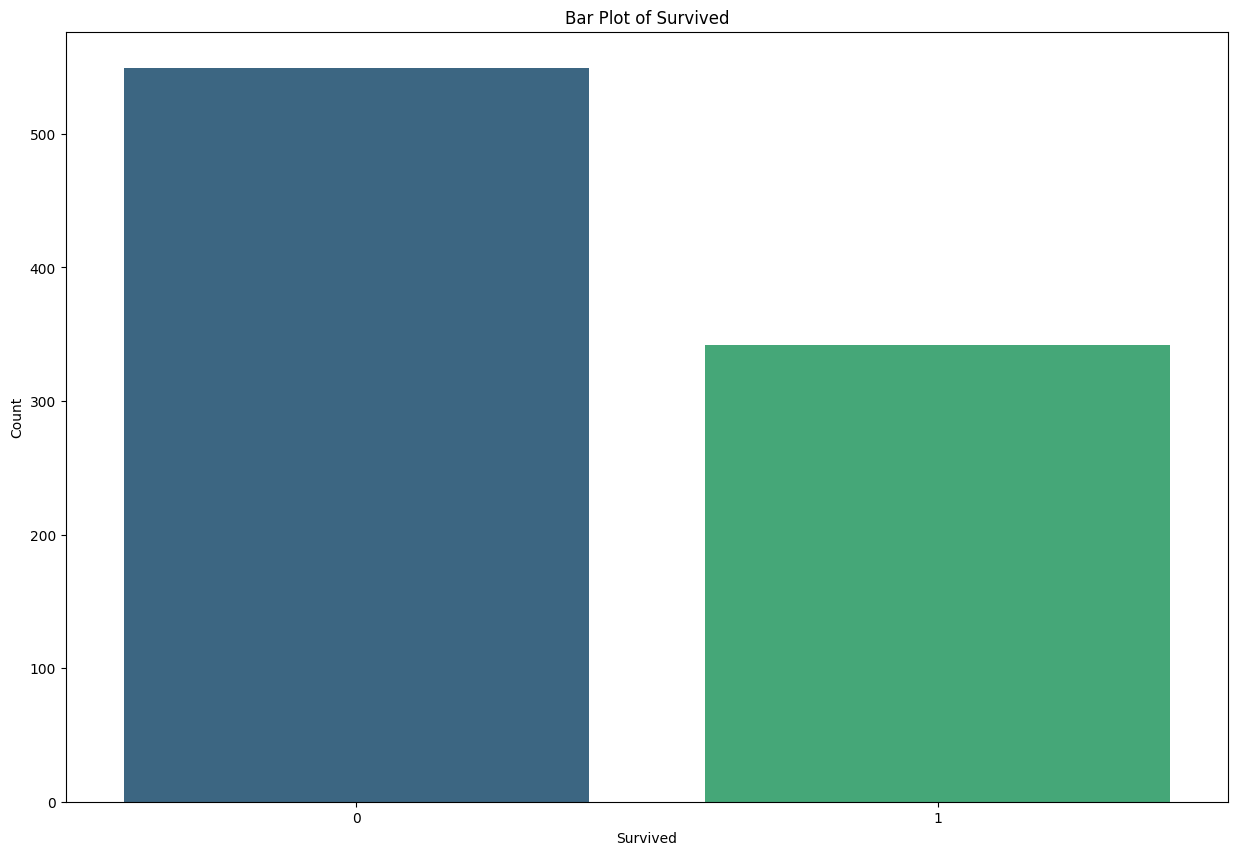

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


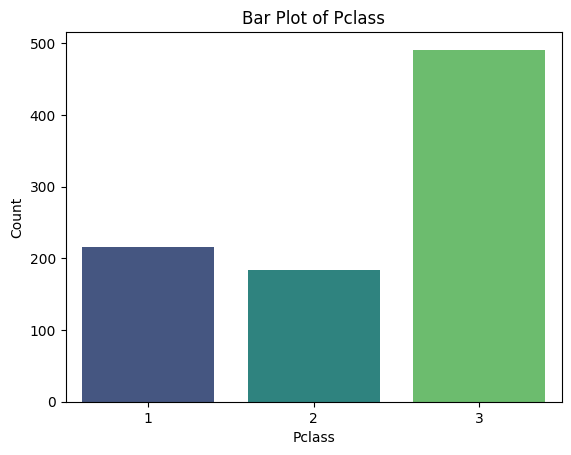

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


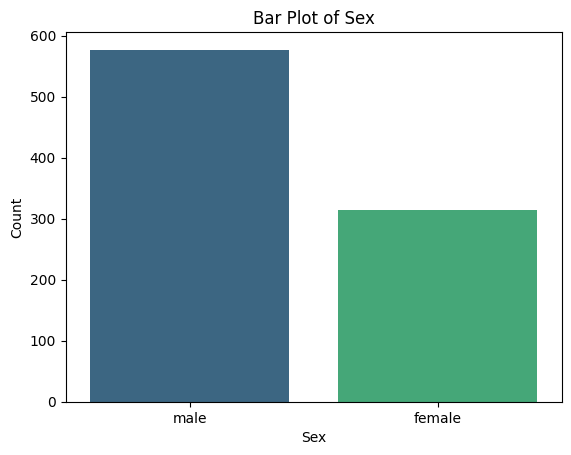

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


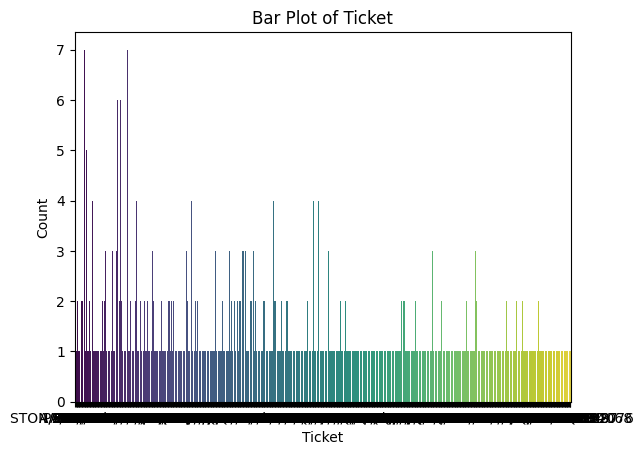

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


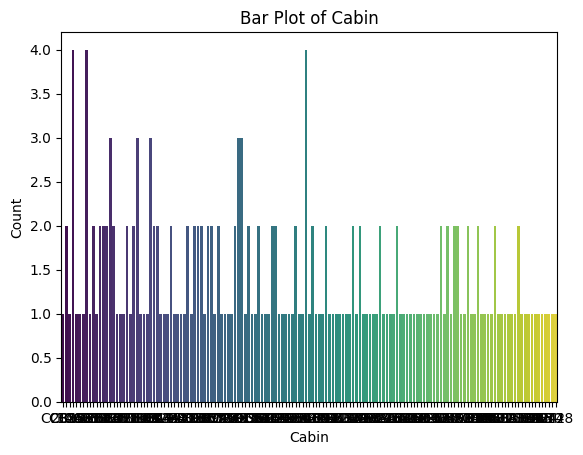

C:\Users\Asus\AppData\Local\Temp\ipykernel_3912\4261306448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cat, palette='viridis')


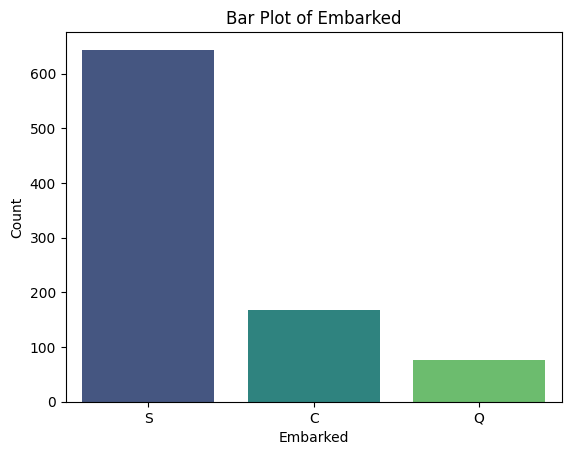

In [62]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# Iterasi melalui setiap kolom kategori
for i, col in enumerate(df_cat.columns):
    # Membuat diagram batang
    sns.countplot(x=col, data=df_cat, palette='viridis')

    # Menambahkan label pada sumbu x dan y serta judul
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {col}')

    # Menampilkan plot
    plt.show()

In [74]:
pd.pivot_table(df_train,index='Survived', columns=['Pclass'], values=['Ticket'],aggfunc='count')

Ticket         
Pclass        1   2    3
Survived                
0            80  97  372
1           136  87  119

In [80]:
pd.pivot_table(
    df_train,                   # DataFrame yang akan di-pivot
    index='Survived',           # Kolom yang akan dijadikan indeks (baris) pada tabel pivot
    columns=['Sex'],            # Kolom yang akan dijadikan kolom pada tabel pivot
    values=['Ticket'],          # Nilai yang akan dihitung (dihitung berdasarkan fungsi agregasi)
    aggfunc='count'             # Fungsi agregasi yang akan digunakan (dalam hal ini, menghitung jumlah)
)

Ticket     
Sex      female male
Survived            
0            81  468
1           233  109

In [81]:
pd.pivot_table(
    df_train,                   # DataFrame yang akan di-pivot
    index='Survived',           # Kolom yang akan dijadikan indeks (baris) pada tabel pivot
    columns=['Embarked'],            # Kolom yang akan dijadikan kolom pada tabel pivot
    values=['Ticket'],          # Nilai yang akan dihitung (dihitung berdasarkan fungsi agregasi)
    aggfunc='count'             # Fungsi agregasi yang akan digunakan (dalam hal ini, menghitung jumlah)
)

Ticket         
Embarked      C   Q    S
Survived                
0            75  47  427
1            93  30  217

In [82]:
pd.pivot_table(
    df_train,                   # DataFrame yang akan di-pivot
    index='Survived',           # Kolom yang akan dijadikan indeks (baris) pada tabel pivot
    columns=['Pclass'],            # Kolom yang akan dijadikan kolom pada tabel pivot
    values=['Ticket'],          # Nilai yang akan dihitung (dihitung berdasarkan fungsi agregasi)
    aggfunc='count'             # Fungsi agregasi yang akan digunakan (dalam hal ini, menghitung jumlah)
)

Ticket         
Pclass        1   2    3
Survived                
0            80  97  372
1           136  87  119

In [89]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [96]:
df_train['cabin_title'] =  df_train['Cabin'].apply(lambda x: '0' if pd.isna(x) else x[0])

In [94]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()

df_train['cabin_title'] = le.fit_transform(df_train['cabin_title'])

In [99]:
df_train[['Cabin','cabin_title']]

,Cabin,cabin_title
0,NaN,0
1,C85,3
2,NaN,0
3,C123,3
4,NaN,0
...,...,...
886,NaN,0
887,B42,2
888,NaN,0
889,C148,3


In [100]:
df_train['cabin_title'].value_counts()

cabin_title
0    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
8      1
Name: count, dtype: int64

In [105]:
pd.pivot_table(data=df_train,index=['Survived'], columns=['cabin_title'],values=['Ticket'],aggfunc='count')

Ticket                                            
cabin_title      0    1     2     3     4     5    6    7    8
Survived                                                      
0            481.0  8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0
1            206.0  7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN

In [114]:
df_train['Ticket_title'] = df_train['Ticket'].apply(lambda x : x.split(' ')[0] if x.isnumeric() == False else 1)

In [116]:
df_train['Ticket_title'].value_counts()

Ticket_title
1             661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

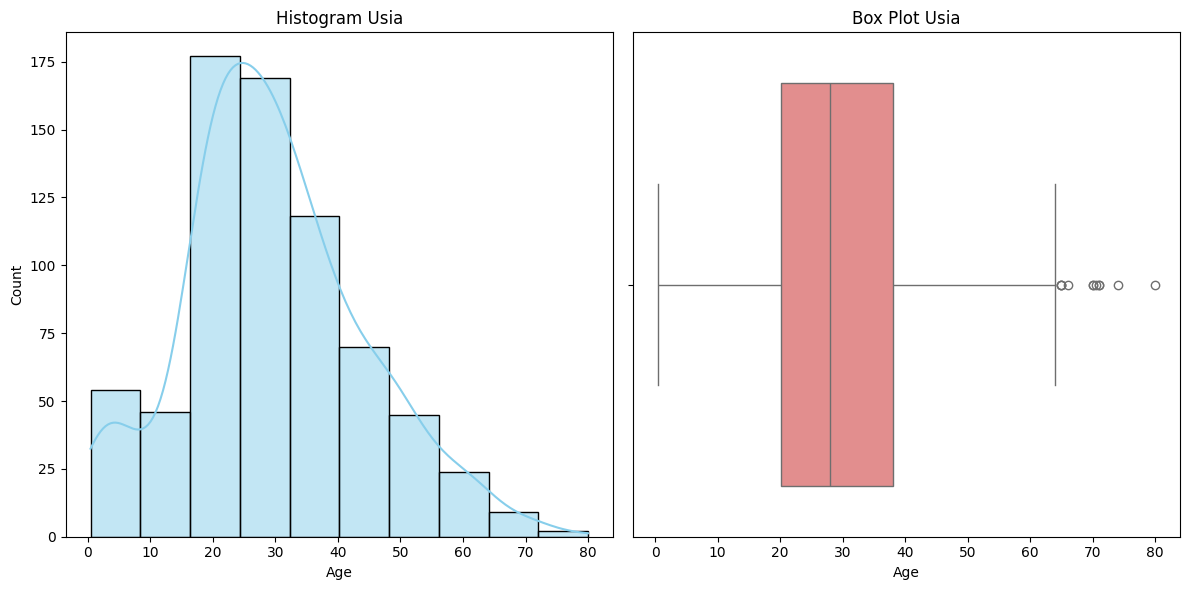

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(df_train2['Age'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram Usia')

# Box Plot
sns.boxplot(x=df_train2['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot Usia')

# Menampilkan visualisasi distribusi
plt.tight_layout()
plt.show()

In [7]:
nan_counts = df_train.isna().sum()
nan_percentages = (nan_counts / len(df_train)) * 100
nan_percentages = nan_percentages.sort_values(ascending=False)

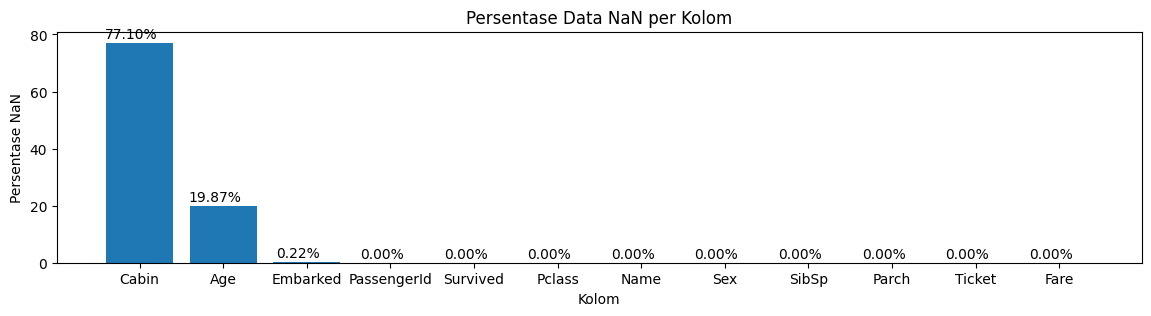

In [8]:
plt.figure(figsize=(14, 3))

# Membuat bar chart
bars = plt.bar(nan_percentages.index, nan_percentages)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kolom')
plt.ylabel('Persentase NaN')

# Menambahkan judul
plt.title('Persentase Data NaN per Kolom')

# Menambahkan label persentase pada setiap batang
for bar, percentage in zip(bars, nan_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Menampilkan grafik
plt.show()

- Feature cabin memiliki persentase yang lebih dari 70% sehingga lebih baik didrop
- Age karena kurang dari 20% maka lebih baik difill the value

In [9]:
df_train2 = df_train.copy()

In [10]:
df_train2.drop(columns=['Cabin'],axis=1, inplace=True)

## FILLING THE AGE COLUMN

1. ANALYSIS THE OUTLIER OF AGE

In [11]:
df_train2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Dari deskripsi statistik untuk kolom 'Age' dalam DataFrame df_train2, kita dapat mengamati beberapa informasi terkait distribusi:

- Mean (Rata-rata): 29.70
- Median (Kuartil kedua atau Q2): 28.00
- Standar Deviasi (Std): 14.53

Distribusi data dapat dianggap mendekati normal jika mean dan median memiliki nilai yang relatif mendekat dan jika nilai standar deviasi tidak terlalu besar. Namun, kita juga perlu mempertimbangkan skewness dan keberadaan outlier.

Dalam hal ini, perbandingan antara mean dan median tidak terlalu besar (29.70 vs. 28.00), yang bisa mengindikasikan distribusi yang cenderung simetris. Standar deviasi juga tidak terlalu besar (14.53), yang menunjukkan bahwa data tidak terlalu tersebar jauh dari rata-rata.

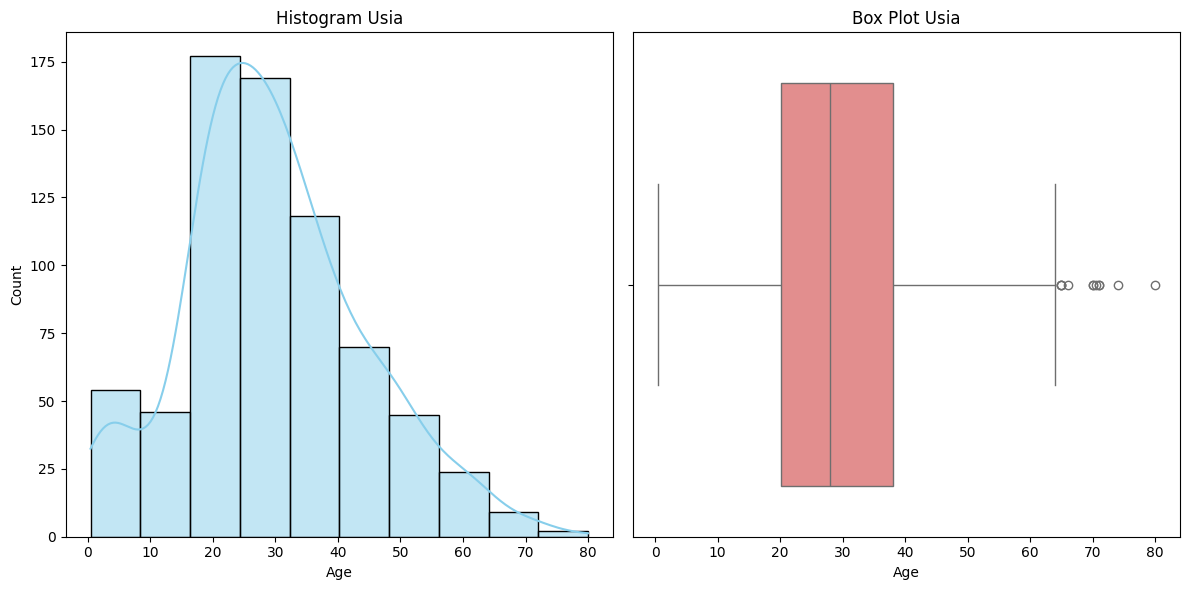

In [12]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram
sns.histplot(df_train2['Age'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram Usia')

# Box Plot
sns.boxplot(x=df_train2['Age'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot Usia')

# Menampilkan visualisasi distribusi
plt.tight_layout()
plt.show()

In [13]:
# Mengisi nilai NaN dengan nilai rata-rata
df_train2['Age Mean'] = df_train2['Age'].fillna(df_train2['Age'].mean())

# Mengisi nilai NaN dengan nilai median
df_train2['Age Median'] = df_train2['Age'].fillna(df_train2['Age'].median())

In [14]:
df_train2.drop(columns=['Age'],axis=1,inplace=True)

In [15]:
df_train2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age Mean,Age Median
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.000000,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.000000,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.000000,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.000000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,27.000000,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,19.000000,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,29.699118,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,26.000000,26.0


## FEATURE ENCODING

1. EMBARKED TARGET ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df_train3 = df_train2.copy()

In [18]:
y = df_train2['Embarked']

label_encoder = LabelEncoder()

# Transformasi variabel target dengan LabelEncoder
df_train3['Embarked'] = label_encoder.fit_transform(y)

2. SEX ONE HOT ENCODE

In [19]:
y = df_train2['Sex']

label_encoder = LabelEncoder()

# Transformasi variabel target dengan LabelEncoder
df_train3['Sex'] = label_encoder.fit_transform(y)

## MULTIVARIATE ANALYSIS

<Axes: >

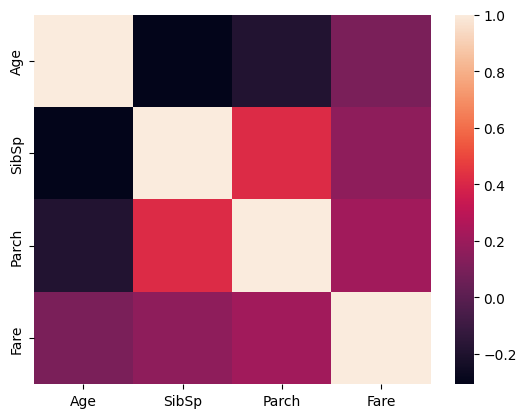

In [47]:
sns.heatmap(df_num.corr())

<Axes: >

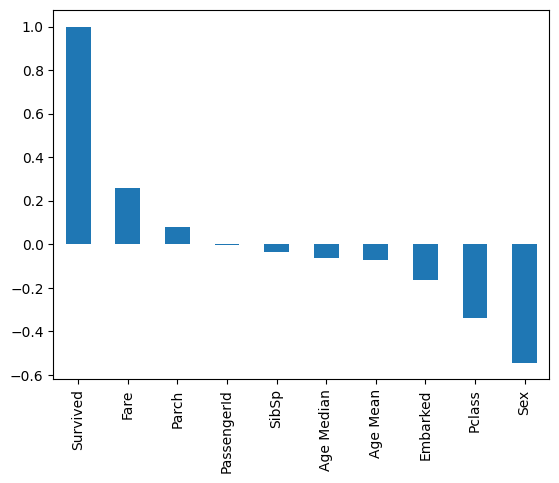

In [21]:
df_train3.select_dtypes(exclude='object').corr()['Survived'].sort_values(ascending=False).plot(kind='bar')

## DATA SPLITTING

In [22]:
from sklearn.model_selection import train_test_split

1. MENGGUNAKAN RATA RATA UMUR

In [23]:
X = df_train3.drop(columns=['Age Median','Survived','Name','Ticket'])
y = df_train3['Survived']

# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)
display(X_train)

Ukuran Set Pelatihan: (712, 8) (712,)
Ukuran Set Pengujian: (179, 8) (179,)


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Mean
331,332,1,1,0,0,28.5000,2,45.500000
733,734,2,1,0,0,13.0000,2,23.000000
382,383,3,1,0,0,7.9250,2,32.000000
704,705,3,1,1,0,7.8542,2,26.000000
813,814,3,0,4,2,31.2750,2,6.000000
...,...,...,...,...,...,...,...,...
106,107,3,0,0,0,7.6500,2,21.000000
270,271,1,1,0,0,31.0000,2,29.699118
860,861,3,1,2,0,14.1083,2,41.000000
435,436,1,0,1,2,120.0000,2,14.000000


In [24]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
# Membuat model regresi logistik
model = LogisticRegression(random_state=42)

In [26]:
# Melatih model menggunakan set pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Menggunakan Median Umur

In [27]:
X = df_train3.drop(columns=['Age Mean','Survived','Name','Ticket'])
y = df_train3['Survived']

# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)

Ukuran Set Pelatihan: (712, 8) (712,)
Ukuran Set Pengujian: (179, 8) (179,)


In [28]:
# Melatih model menggunakan set pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
